# Modelling the effect of the Lelylijn?

### Group 18

Members: Antonie Hille, Bram Dorland, Michael Liem, Nynke Sterk, Gergely Turi​

GitHub repository: https://github.com/mtliem98/TIL6022_projectgroup_18

# Contribution Statement

Antonie Hille:

Bram Dorland: Code for the model. Integration. Writing the report.

Michael Liem:

Nynke Sterk: Code for the P-graph, estimation of travellers at Emmeloord and Drachten, report writing

Gergely Turi​: manual import of passenger numbers, location of the new stations, GTFS import and extraction, parts of the presentation, travel time calculation, initial version of the report, travel time heatmap

# Introduction

The Lelylijn is the proposed railway line between Lelystad and Groningen, crossing through the Noordoostpolder. It will be a new railway connection which aims to significantly decrease travel times between the North of the Netherlands and the Randstad. As part of the Lelylijn, two new stations, Emmeloord and Drachten, will be constructed. This will provide rail access to regions that currently lack direct train connections. Currently all railway connections to Friesland, Drenthe and Groningen pass through Zwolle, the Lelylijn would provide an alternative for this. In this project, the effect of the construction of the Lelylijn on the railway network is modelled to investigate its effect on travel times and line usage of the surrounding railway network.

# Research Questions

How many people travel between each station currently?

See how the newly built line would affect the travel time map.

How many people have better access to big transport hubs?

How many passengers will use the Lelylijn without any additional demand?​

How does the passenger flow change with the Lelylijn on the surrounding train lines without any additional demand?​

# Data Used

For our exercise we used two main sources of data, along with other minor ones. To build our OD matrix, we used the publicly available NS Traveller behaviour dataset. This includes the yearly workday averages of different passenger metrics on all NS operated railway lines. At time of submission, it is accessible on the following link: https://dashboards.nsjaarverslag.nl/reizigersgedrag

![alt text](Images/dashboard.png)

To get the locations of the statios and the median travel time between them, our program automatically fetches the latest GTFS database from https://gtfs.ovapi.nl/nl/gtfs-nl.zip and compares it with the local copy (if it already exists).

As for Lelylijn's proposed travel times, we used the following map, found in the following .pdf file, on Lelylijn's website: https://delelylijn.nl/wp-content/uploads/2024/05/28-Meibrief-Lelylijn_280524.pdf

![alt text](<Images/new travel times.png>)

# Data Pipeline

Import data on all stations and lines.

Import GTFS dataset.

Create L and P-graph.

Use a shortest path algorithm to determine the cost of travelling between two places.

Model travel behaviour and create an OD-matrix.

Verify the above model with the directional data from the NS.

Calculate the projected change in travel times (and create maps and charts on it).

Apply the same travel behaviour model to the new map with the same number of passengers.

# Scale

To keep our workload within reasonable limits, we had to limit the scope of our work, both in terms of geographical and temporal means

### Geographical

To keep the input data relevant to Lelylijn, we only included station data within the following geographical limits: 

* East of Amsterdam​

* Northeast of Utrecht​

* North of Deventer​

This way we made sure the theoretical construction the new high-speed railway line wil not affect the passenger flow situated far from the new piece of infrastructure.

![alt text](<Images/geo limits.png>)

### Temporal

As for the number of passengers, we used the most recent data available on the NS website (year 2024). We applied the numbers gathered from this source all the way through the entire exercise.

In reality, the construction will draw more travelers to trains, changing the modal split and raising the line usage. We did not account for this effect, we applied the already mentioned demand data to the new line. Besides that, the construction of the Lelylijn could also enhance housing construction near the Lelylijn (transport oriented development), however we do not account for the additional demand that this would result in.

# Data visualization

Before analysing the data, it needs to be downloaded and imported to the code.

table with big stations, travel time change (heatmap/table) (Antonie, Gergő)
big stations: Groningen, Leeuwarden, Zwolle, Lelystad, Amsterdam grouped, Utrecht Centraal, Amersfoort Centraal, Weesp

map of edge saturation near Zwolle

change of demand per edge (as the demand is mostly centered around AMS)

In [6]:
import sys
sys.path.append("src")
import branca.colormap as cm

from src.notebook_backend import Analyser
analyser = Analyser() #the object we are going to use for analysis

.zip file is within requested age
Extracting gtfs-nl.zip to c:\Users\bramd\gits\TIL6022_projectgroup_18\src\..\data\gtfs-nl...
Extraction complete


c:\Users\bramd\gits\TIL6022_projectgroup_18\src\GTFS_load_gdf.py:131: DtypeWarning: Columns (6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  _df = pd.read_csv(path)


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
get stations nodes
0                   Groningen
1                   Groningen
2                   Groningen
3        Groningen Europapark
4        Groningen Europapark
                ...          
195          Amsterdam Amstel
196    Amsterdam Science Park
197    Amsterdam Science Park
198                    Diemen
199                    Diemen
Name: Station, Length: 200, dtype: object
81
Nodes loaded
----------------------------------------------------

Open data\interact_map.html to the side or in an external browser to view it live.
 Note: changes with the code are live updated



Now the data is loaded it, a graph with all the physical lines can be drawn. This can be seen in the map below.

In [7]:
analyser.map

For determining the line usage, it first needs to be known how many people travel from which station to which station. This data isn't publicly available, so it has to be estimated. For this estimation, a gravitational model is used. The larger stations attract more people from further away and stations closer by also attract more passengers. It is assumed that the attractive force of a station is linearly dependend on the travel time and the size of the station (the number of passengers using the station). This model generates a matrix called a origin destination matrix, or in short OD-matrix.

With this information, the usage of the track sections can be determined. The result of this can be seen in the following map. 

In [8]:
analyser.analyse_original_network()

|████████████████████████████████████████| 6561/6561 [100%] in 0.1s (61839.52/s) 


c:\Users\bramd\gits\TIL6022_projectgroup_18\src\Railmap.py:90: RuntimeWarning: divide by zero encountered in divide
  shortest_paths = np.divide(1, costs)
c:\Users\bramd\gits\TIL6022_projectgroup_18\src\Railmap.py:98: RuntimeWarning: invalid value encountered in scalar divide
  od[start, end] = (q[end]*shortest_paths[start, end])/(path_sum)*p[start]


[1.60640000e+04 1.62003911e+04 1.67643303e+04 2.26568430e+04
 2.40332653e+04 2.70873132e+04 4.65074062e+04 6.70099799e+03
 5.27430963e+03 4.42761179e+04 3.86304460e+04 5.41642531e+03
 7.70500000e+03 8.30868588e+03 8.97599185e+03 1.33709290e+04
 4.68587254e+03 4.41695721e+04 3.85652834e+04 4.45503411e+04
 4.74376560e+04 4.84584083e+04 5.11133531e+04 5.22658360e+04
 6.44780320e+04 6.57702455e+04 6.85580656e+04 6.85580656e+04
 4.18403293e+04 7.03567661e+04 4.76012264e+04 4.30440086e+04
 6.97180380e+04 4.76012264e+04 4.54367660e+04 4.50573917e+04
 4.54276141e+04 2.79990387e+04 1.77930470e+04 2.76790719e+04
 7.50758045e+02 1.44993825e+04 5.61297753e+04 1.48010761e+04
 2.84600822e+04 9.36952903e+01 5.60448906e+04 1.80809291e+03
 1.02348533e+04 2.84600822e+04 7.88104722e+03 5.99323685e+03
 5.30812585e+03 4.67992256e+03 3.24517736e+03 2.88362604e+03
 3.87037805e+04 5.46586746e+04 5.23156784e+03 5.49498582e+04
 4.45337845e+03 3.95355650e+03 3.11558585e+03 2.79200496e+03
 5.55079979e+04 5.750437

In [14]:
cm.LinearColormap(["#00004C", "#0000FF", "#7F9EFF", "#D0D8E8", "#FF9EA0", "#FF0000", "#800000"], index=[0, 1000, 5000, 20000, 50000, 70000, 100000], vmin=0, vmax=100000)

Now that the line usage of the current situation is known, the new situation needs to be determined. In the heatmap below, the reduction of the travel times can be seen. 

|████████████████████████████████████████| 6561/6561 [100%] in 0.1s (60419.98/s) 


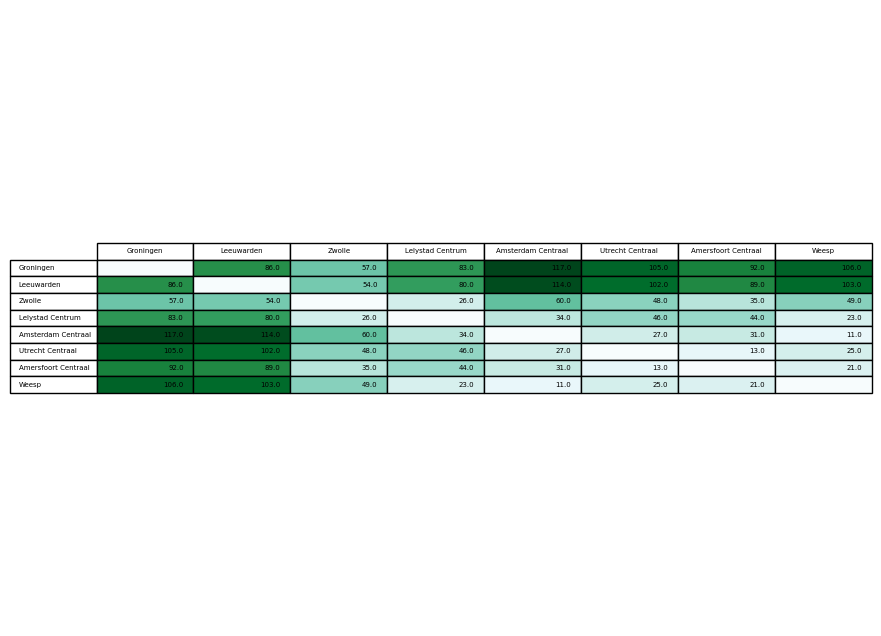

In [10]:
analyser.show_shortest_path_table() #add units to the table

In [15]:
cm.LinearColormap(["#00004C", "#0000FF", "#7F9EFF", "#D0D8E8", "#FF9EA0", "#FF0000", "#800000"], index=[0, 1000, 5000, 20000, 50000, 70000, 100000], vmin=0, vmax=100000)

With this information, a new map can be created with the lelylijn included. Also two new stations have been added: Emmeloord with 3177 passengers and Drachten with 5314 passengers. These passenger numbers have been estimated based on the inhabitants of these towns and the surrounding towns with a station. The exact methodology can be found in the Estimation_daily travelers_Drachten_Emmeloord.py. 

After adding the new stations, a new OD-matrix can be made, which also includes the lelylijn. This shifts both the line usage, as well as the destinations chosen by passengers. This makes sense as most passengers prefer using stations close by, as well as using the fastest route. In the graph below, the new line usage can be seen on the map.

In [12]:
import pandas as pd
additional_stations = pd.DataFrame({"Station":["Emmeloord", "Drachten", "Heerenveen", "Groningen"], 
                                    "Travelers_per_day":[3177, 5314, 5001, 16064], 
                                    "Getting_on_off":[3177, 5314, 4970, 16064], 
                                    "Direction_to":["Lelystad Centrum", "Heerenveen", "Emmeloord", "Drachten"],
                                    "Switchers":[0,0,0,0],
                                    "Travelers_to":[0,0,0,0]})
new_travel_times = pd.DataFrame({"travel_time_min": [13,8,14,13], 
                                    "from_station":["Groningen", "Drachten", "Heerenveen", "Emmeloord"], 
                                "to_station": ["Drachten", "Heerenveen", "Emmeloord", "Lelystad Centrum"]})
colormap = cm.LinearColormap(["#00004C", "#0000FF", "#7F9EFF", "#D0D8E8", "#FF9EA0", "#FF0000", "#800000"], index=[0, 1000, 5000, 20000, 50000, 70000, 100000])

analyser.analyse_extended_network(additional_stations, new_travel_times)

|████████████████████████████████████████| 6889/6889 [100%] in 0.1s (69500.77/s) 


c:\Users\bramd\gits\TIL6022_projectgroup_18\src\Railmap.py:90: RuntimeWarning: divide by zero encountered in divide
  shortest_paths = np.divide(1, costs)
c:\Users\bramd\gits\TIL6022_projectgroup_18\src\Railmap.py:98: RuntimeWarning: invalid value encountered in scalar divide
  od[start, end] = (q[end]*shortest_paths[start, end])/(path_sum)*p[start]


get stations nodes
0                 Groningen
1                 Groningen
2                 Groningen
3      Groningen Europapark
4      Groningen Europapark
               ...         
199                  Diemen
200               Emmeloord
201                Drachten
202              Heerenveen
203               Groningen
Name: Station, Length: 204, dtype: object
83
Nodes loaded
----------------------------------------------------

Open data\extended_network.html to the side or in an external browser to view it live.
 Note: changes with the code are live updated



# Answers to the questions here?

### How many people travel between each station currently?
On the .. name of map.. the number of people currently travelling between each station can be seen. It stands out that the railway tracks surrounding Amsterdam and the trajectory between Amsterdam … and Utrecht Central Station are used intensively with … passengers per day. Besides that, the connection from Zwolle to Meppel is also used by many passengers. This is currently the only connection to Friesland and Groningen, thus all passengers going North must use this part of the railway network. After Meppel, the railway tracks splits in a route towards and Leeuwarden and a route towards Groningen. Most people follow the trajectory towards Groningen which could have been expected as Groningen has almost double the amount of inhabitants compared to Leeuwarden...
### See how the newly built line would affect the travel time map.
In the heatmap, the decrease in travel time can be seen. It can be concluded that the greatest amount of time is saved on the trajectory...

### How many people have better access to big transport hubs?
As stated before, the Lelylijn would most likely result in more housing being developed near the stations along this line. However, to limit the scope of this project, this additional demand was not accounted for.
However, it is certain that two new stations will be developed, Emmeloord and Drachten. An estimation of the amount of travelers that would use these station was done. Emmeloord has an expected usage of 3177 passengers per day and Drachten has an expected usage of 5314 passengers per day. We can therefore say that at least 8491 people will start using a train station that did not do so before the Lelylijn was constructed. However if we look at the population of Emmeloord and Drachten, respectively 27,500 and 46,000, it could be said that almost 73,500 more people will have access to a transport hub.

### How many passengers will use the Lelylijn without any additional demand?
As can be seen in the map with the new line is that depending on the section about 8600 to 22.000 passengers will use the lelylijn daily. This includes the new demand from the new stations. Despite that, the lelylijn still attracts passengers from other lines.

### How does the passenger flow change with the Lelylijn on the surrounding train lines without any additional demand?
The new lelylijn attracts passengers from other lines, but also has new stations build, which can increase the demand on these lines. Despite that, the most notable differences are on the lines between Lelystad and Zwolle and between Zwolle and Meppel. The demand decreases from about 44.000 to 27.000 and 46.000 to 27.000 passengers respectively. 

# Conclusion

As we have previously demonstrated, the construction of Lelylijn will definitely attract many passengers, decreasing the load on surrounding lines. Despite this project only including current demand, there will probably also be increased demand as the travel time between the northern part of the Netherlands and the Randstad is shorter with the new line. 